<a href="https://colab.research.google.com/github/breinerLopez10/MethNumUN2023/blob/main/Brlopezf_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

pip install -U fortran-magic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.4 MB/s eta 0:00:00


In [ ]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00',
                             '2017-01-07 00:00:00+00:00',
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [ ]:
# Lists can also be sliced, which makes a copy of elements between
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'David': 'Hume',
 'Immanuel': 'Kant',
 'Bertrand': 'Russell',
 'Ludwig': 'Wittgenstein'}

In [ ]:
del philosophers['David']
philosophers

{'Immanuel': 'Kant', 'Bertrand': 'Russell', 'Ludwig': 'Wittgenstein'}

In [ ]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: ignored

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [ ]:
%%time

matmul(a, b)

CPU times: user 38 µs, sys: 0 ns, total: 38 µs
Wall time: 41.5 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 0 - cpu info**

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
addres

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [ ]:
%%time
matmul(a, b)

IndexError: ignored

**My own example 3 - Chekcing the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
def matmul(A, B):

    if len(A[0]) == len(B):
      print("Matrix dimensions are compatible ")

    rows = len(A)
    cols = len(B[0])
    out = [[0 for col in range(cols)] for row in range(rows)]

    for i in range(rows):
        for j in range(cols):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
%%time

matmul(a, b)

IndexError: ignored



**My own example 5 - Deifining A and B that are compatible for multiplcation**

In [ ]:
a = [[12, 56, 5, 65],
     [3, 1, 89, 45],
     [24, 78, 5, 98]]

b = [[2, 45, 64],
     [4, 12, 65],
     [4, 67, 98],
     [34, 15, 89]]



**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [ ]:
import random

In [ ]:
random.normalvariate(0,1)

-1.1780330982287133

In [ ]:
import random
def random_m(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_m(2, 3)
randm

[[0.30508285365578913, 0.233558143355155, 0.8303081832081285],
 [0.33650455652562083, 0.026397870155859704, 0.34654636779318837]]

**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [ ]:
import numpy as np
import time

rows_a = 600
cols_a = 100
rows_b = 100
cols_b = 600

randa = [[random.random() for _ in range(cols_a)] for _ in range(rows_a)]
randb = [[random.random() for _ in range(cols_b)] for _ in range(rows_b)]

# Run matmul 10 times and calculate average execution time
num_runs = 10
total_execution_time = 0

for _ in range(num_runs):
    start_time = time.time()
    matmul(randa, randb)
    end_time = time.time()
    execution_time = end_time - start_time
    total_execution_time += execution_time

average_execution_time = total_execution_time / num_runs
print(f"Average execution time: {average_execution_time:.6f} seconds")


Matrix dimensions are compatible 
Matrix dimensions are compatible 
Matrix dimensions are compatible 
Matrix dimensions are compatible 
Matrix dimensions are compatible 
Matrix dimensions are compatible 
Matrix dimensions are compatible 
Matrix dimensions are compatible 
Matrix dimensions are compatible 
Matrix dimensions are compatible 
Average execution time: 9.270090 seconds


**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [ ]:
import pandas as pd

x = 0
fs = {'languaje':['Python'],
        'Promedio de segundos':[average_execution_time],
        }

df = pd.DataFrame(fs)
display(df)



,languaje,Promedio de segundos
0,Python,9.27009


**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [ ]:
import time
a = np.array(randa)
b = np.array(randb)

n=10
average = 0

for i in range(n):
  start = time.process_time()
  c=a@b
  end = time.process_time()
  average += end-start

average /= 10
print(average)

0.006891026700003522


In [ ]:
import pandas as pd

time_program = {'Language': ["Python", "Numpy"],
                "Average Time in Secs": [average_execution_time, average]}

df = pd.DataFrame(time_program, index=range(1, len(time_program['Language'])+1))

df

,Language,Average Time in Secs
1,Python,9.270090
2,Numpy,0.006891


In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result

    result = sum(xs * ys)
end

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 16.3 ms, sys: 0 ns, total: 16.3 ms
Wall time: 19.6 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 206 µs, sys: 0 ns, total: 206 µs
Wall time: 212 µs


333328333350000.0

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Deifining A (2x2)  and B (2x2)**

In [ ]:
a = [[5, 9],
     [4, 1]]

b = [[6, 3],
     [8, 2]]

**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [ ]:
%%fortran

subroutine matmul(A, B, out)
    real(8), intent(in) :: A(2,2), B(2,2)
    real(8), intent(out) :: out(2,2)
    integer :: i, j, k

    if (size(A, 2) /= size(B, 1)) then
        write(*, *) "Matrix dimensions are not compatible"
        return
    end if

    out = 0.0

    do i = 1, size(A, 1)
        do j = 1, size(B, 2)
            do k = 1, size(A, 2)
                out(i, j) = out(i, j) + A(i, k) * B(k, j)
            end do
        end do
    end do

end subroutine matmul


**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [ ]:
an = np.array(a)
bn = np.array(b)

In [ ]:
%%time
matmul(an,bn)

CPU times: user 53 µs, sys: 0 ns, total: 53 µs
Wall time: 58.7 µs


array([[102.,  33.],
       [ 32.,  14.]])

**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [ ]:
%%fortran
subroutine matmul_large(A, B, out)
    real(8), intent(in) :: A(600, 100), B(100, 600)
    real(8), intent(out) :: out(600, 600)
    integer :: i, j, k

    if (size(A, 2) /= size(B, 1)) then
        write(*, *) "Matrix dimensions are not compatible"
        return
    end if

    out = 0.0

    do i = 1, size(A, 1)
        do j = 1, size(B, 2)
            do k = 1, size(A, 2)
                out(i, j) = out(i, j) + A(i, k) * B(k, j)
            end do
        end do
    end do

end subroutine matmul_large

**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [ ]:
randSS = random_m(600, 100)
randFF = random_m(100, 600)

ss = np.array(randSS)
ff = np.array(randFF)
matmul_large(ss,ff)

array([[26.69844297, 24.51716   , 26.0771373 , ..., 28.4786592 ,
        24.89490807, 25.25106464],
       [27.84948355, 28.0541998 , 26.91050031, ..., 28.38209266,
        26.54507395, 25.54266425],
       [28.16506592, 27.25551758, 27.06668894, ..., 29.95721912,
        27.65729796, 26.52825601],
       ...,
       [24.81307823, 22.7457335 , 25.50683451, ..., 25.53161274,
        23.60078281, 23.6784402 ],
       [27.95282839, 26.95389391, 26.46271837, ..., 28.72011123,
        26.36302313, 25.81236247],
       [27.95532942, 26.07668345, 29.0058229 , ..., 28.21990594,
        27.74510247, 26.92537011]])

**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [ ]:
import time as tm

time_sum = 0

for i in range(10):
  start_time = time.time()
  randSS = random_m(600, 100)
  randFF = random_m(100, 600)
  mult = matmul_large(randSS, randFF)
  end_time = time.time()
  time_sum += end_time - start_time



average_time_fortran_magic = (time_sum/10)
print("Average execution time with Fortran: {0}".format(average_time_fortran_magic))

Average execution time with Fortran: 0.07479815483093262


In [ ]:
import pandas as pd

time_program = {'Language': [ "Python", "Numpy","Fortran Magic"],
                "Average Time in Secs": [average_execution_time, average, average_time_fortran_magic]}


df = pd.DataFrame(time_program, index=range(1, len(time_program[ 'Language' ])+1))

df

,Language,Average Time in Secs
1,Python,9.270090
2,Numpy,0.006891
3,Fortran Magic,0.074798


**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile MatMulFortran.f90
      program matMulBig
        integer :: n,m
        real :: matA(600,100)
        real :: matB(100,600)
        real :: result(600,600)
        real :: average

        ! Result matrix has:
        ! Rows = rows of matrix A
        ! Columns = columns of matrix B

        n = 600
        m = 100

        ! Fill matrix
        call random_number(matA)
        call random_number(matB)

        ! Matrix Multiplication
        average = 0
        call repetitions(n, m, matA, matB, result, 10, average)
        write (*,*) "Average Fortran Program:", average, "seconds"

        ! write to ascii file
        open(unit=1,file="fortran_average.txt",status='replace')
        write(1,*) average
        close(1)

        stop
      end

      subroutine repetitions(n, m, matA, matB, result, rep, average)
        ! F15.3 format: F -> real numbers, 15-> digit accept, 3 -> decimal spaces
        ! A -> strings, X -> blank spaces, I -> integers

        integer :: n,m, rep
        real :: matA(n,m)
        real :: matB(m,n)
        real :: result(n,n)
        real :: average, start, endTime, time

        do i=1, rep

          time = 0.0
          start = 0.0
          endTime = 0.0

          call cpu_time(start)
          result = matmul(matA, matB)
          call cpu_time(endTime)

          time = endTime - start

          write (*,"(A9, I3, A4, E12.4, A7)") "Execution", i, "->", time, "seconds"

          average = average + time

        end do

        average = average / rep
      end

Writing MatMulFortran.f90


**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%shell

gfortran MatMulFortran.f90 -o matmulfortran

In [ ]:
!gfortran matmulBig.f -o matmulBig
!./matmulBig

f951: Error: Cannot open file ‘matmulBig.f’
<built-in>: Fatal Error: cannot open input file: matmulBig.f
compilation terminated.
/bin/bash: line 1: ./matmulBig: No such file or directory


In [ ]:
import subprocess
result = subprocess.run(["./matmulfortran"], capture_output=True, text=True)

output_lines = result.stdout.strip().split("\n")
average_time_fortran = output_lines[-1].split()[-2]

# Print the average time
print("Average Time in Fortran:", average_time_fortran)

Average Time in Fortran: 3.77849978E-03


**My own example 18 - Adding Fortran average execution time to the data frame**

In [ ]:
import pandas as pd

time_program = {'Language': [ "Python", "Numpy","Fortran Magic", "Fortran"],
                "Average Time in Secs": [average_execution_time, average, average_time_fortran_magic, average_time_fortran]}


df = pd.DataFrame(time_program, index=range(1, len(time_program[ 'Language' ])+1))

df

,Language,Average Time in Secs
1,Python,9.27009
2,Numpy,0.006891
3,Fortran Magic,0.074798
4,Fortran,3.77849978E-03


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile MatMulC.c
#include <stdio.h>
#include <stdlib.h>
#include <time.h>

int main() {
    int n = 600;
    int m = 100;
    int l = 600;

    double a[n][m], b[m][l], c[n][l];

    srand(time(0));

    for (int i = 0; i < m; i++) {
        for (int j = 0; j < n; j++) {
            a[i][j] = (double)rand() / RAND_MAX;
        }
    }

    for (int i = 0; i < m; i++) {
        for (int j = 0; j < l; j++) {
            b[i][j] = (double)rand() / RAND_MAX;
        }
    }

    double t = 0.0;
    time_t begin, end;

    for (int r = 0; r < 10; r++) {
        time(&begin);

        for (int i = 0; i < n; i++) {
            for (int j = 0; j < l; j++) {
                c[i][j] = 0.0;

                for (int k = 0; k < m; k++) {
                    c[i][j] += a[i][k] * b[k][j];
                }
            }
        }

        time(&end);
        double elapsed = difftime(end, begin);
        t += elapsed;
    }

    printf("%.10f\n", t / 10.0);

    return 0;
}


Writing MatMulC.c


**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%shell

gcc MatMulC.c -o matmulc

In [ ]:
%%shell

./matmulc

0.2000000000


**My own example 21 - Adding c average execution time to the data frame**

In [ ]:
import subprocess

result = subprocess.run(["./matmulc"], capture_output=True, text=True)

output_lines = result.stdout.strip().split("\n")
average_time_c = float(output_lines[-1].split()[-1])

# Print the average time
print("Average Time in C:", average_time_c)

Average Time in C: 0.4


In [ ]:
import pandas as pd

time_program = {'Language': [ "Python", "Numpy","Fortran Magic", "Fortran", "C"],
                "Average Time in Secs": [average_execution_time, average, average_time_fortran_magic, average_time_fortran, average_time_c]}

df = pd.DataFrame(time_program, index=range(1, len(time_program[ 'Language' ])+1))

df

,Language,Average Time in Secs
1,Python,9.27009
2,Numpy,0.006891
3,Fortran Magic,0.074798
4,Fortran,3.77849978E-03
5,C,0.4


**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile MatMulCpp.cpp
#include <iostream>
#include <vector>

const int rowsA = 600;
const int colsA = 100;
const int rowsB = 100;
const int colsB = 600;

void matrixMultiply(const std::vector<std::vector<double>>& A, const std::vector<std::vector<double>>& B, std::vector<std::vector<double>>& result) {
    for (int i = 0; i < rowsA; ++i) {
        for (int j = 0; j < colsB; ++j) {
            result[i][j] = 0.0;
            for (int k = 0; k < colsA; ++k) {
                result[i][j] += A[i][k] * B[k][j];
            }
        }
    }
}

int main() {
    std::vector<std::vector<double>> A(rowsA, std::vector<double>(colsA, 1.0));
    std::vector<std::vector<double>> B(rowsB, std::vector<double>(colsB, 2.0));
    std::vector<std::vector<double>> result(rowsA, std::vector<double>(colsB, 0.0));

    for (int iteration = 0; iteration < 10; ++iteration) {
        matrixMultiply(A, B, result);
        // Assign the result back to matrix A for the next iteration
        A = result;
    }

    // Print the first element of the resulting matrix for verification
    std::cout << "Resulting element at (0, 0): " << result[0][0] << std::endl;

    return 0;
}


Writing MatMulCpp.cpp


**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%shell
g++ MatMulCpp.cpp -o matmulcpp

In [ ]:
%%shell
./matmulcpp

Resulting element at (0, 0): 1.024e+23


In [ ]:
import subprocess
result = subprocess.run(["./matmulcpp"], capture_output=True, text=True)

output_lines = result.stdout.strip().split("\n")
average_time_cpp = float (output_lines[-1].split()[-1])

# Print the average time
print("Average Time in C++:", average_time_cpp)

Average Time in C++: 1.024e+23


**My own example 24 - Adding C++ average execution time to the data frame**

In [ ]:
import pandas as pd

time_program = {'Language': [ "Python", "Numpy","Fortran Magic", "Fortran", "C", "C++"],
                "Average Time in Secs": [average_execution_time, average, average_time_fortran_magic, average_time_fortran, average_time_c, average_time_cpp]}


df = pd.DataFrame(time_program, index=range(1, len(time_program[ 'Language' ])+1))
df

,Language,Average Time in Secs
1,Python,9.27009
2,Numpy,0.006891
3,Fortran Magic,0.074798
4,Fortran,3.77849978E-03
5,C,0.4
6,C++,102400000000000000000000.0


**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!pip install jupyter
!python -m ijava.install

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.4/93.4 kB 6.2 MB/s eta 0:00:00
/usr/bin/python3: Error while finding module specification for 'ijava.install' (ModuleNotFoundError: No module named 'ijava')


In [ ]:
!apt update -q

!apt-get install -q openjdk-11-jdk-headless

!curl -L https: //github.com/SpencerPark/IJava/releases/download/v1.3.0/ijava-1.3.0.zip -o ijava-kernel.zip
!unzip -q ijava-kernel.zip -d ijava-kernel && cd ijava-kernel && python3 install.py --sys-prefix

!jupyter kernelspec list


Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [494 kB]
Get:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease [18.1 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [913 kB]
Get:10 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [989 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [990 kB]
Get:12 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18

In [ ]:
%%writefile Matmul.java

public class MatrixMultiplication {
    public static void main(String[] args) {
        int rowsA = 600;
        int colsA = 100;
        int colsB = 600;

        // Initialize matrices A and B with random values
        int[][] A = new int[rowsA][colsA];
        int[][] B = new int[colsA][colsB];

        // Fill matrices with random values (for demonstration purposes)
        initializeMatrix(A);
        initializeMatrix(B);

        // Create the result matrix C
        int[][] C = new int[rowsA][colsB];

        // Perform matrix multiplication
        for (int i = 0; i < rowsA; i++) {
            for (int j = 0; j < colsB; j++) {
                int sum = 0;
                for (int k = 0; k < colsA; k++) {
                    sum += A[i][k] * B[k][j];
                }
                C[i][j] = sum;
            }
        }

        // Print the result matrix C if needed
        // printMatrix(C);
    }

    // Utility method to initialize a matrix with random values
    public static void initializeMatrix(int[][] matrix) {
        int rows = matrix.length;
        int cols = matrix[0].length;
        for (int i = 0; i < rows; i++) {
            for (int j = 0; j < cols; j++) {
                matrix[i][j] = (int) (Math.random() * 10); // Random values between 0 and 9
            }
        }
    }

    // Utility method to print a matrix (for debugging)
    public static void printMatrix(int[][] matrix) {
        int rows = matrix.length;
        int cols = matrix[0].length;
        for (int i = 0; i < rows; i++) {
            for (int j = 0; j < cols; j++) {
                System.out.print(matrix[i][j] + " ");
            }
            System.out.println();
        }
    }
}

Overwriting Matmul.java


**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%shell

javac Matmul.java
java Matmul

Matmul.java:2: error: class MatrixMultiplication is public, should be declared in a file named MatrixMultiplication.java
public class MatrixMultiplication {
       ^
1 error
Error: Could not find or load main class Matmul
Caused by: java.lang.ClassNotFoundException: Matmul


CalledProcessError: ignored

**My own example 27 - Adding Java average execution time to the data frame**

In [ ]:
import subprocess

subprocess.run(["javac", "Matmul.java"])

result = subprocess.run(["java", "Matmul"], capture_output=True, text=True)

average_time_java = result.stdout.strip()

# Print the average time
print("Average Time in Java:", average_time_java)

Average Time in Java: 


In [ ]:
import pandas as pd

time_program = {'Language': [ "Python", "Numpy","Fortran Magic", "Fortran", "C", "C++", "Java"],
                "Average Time in Secs": [average_execution_time, average, average_time_fortran_magic, average_time_fortran, average_time_c, average_time_cpp, average_time_java]}


df = pd.DataFrame(time_program, index=range(1, len(time_program[ 'Language' ])+1))
df

,Language,Average Time in Secs
1,Python,9.27009
2,Numpy,0.006891
3,Fortran Magic,0.074798
4,Fortran,3.77849978E-03
5,C,0.4
6,C++,102400000000000000000000.0
7,Java,


**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile Matmul.js
function multiplyMatrices(A, B) {
    const result = [];
    const rowsA = A.length;
    const colsA = A[0].length;
    const rowsB = B.length;
    const colsB = B[0].length;

    if (colsA !== rowsB) {
        throw new Error("Number of columns in A must match number of rows in B");
    }

    for (let i = 0; i < rowsA; i++) {
        result[i] = [];
        for (let j = 0; j < colsB; j++) {
            let sum = 0;
            for (let k = 0; k < colsA; k++) {
                sum += A[i][k] * B[k][j];
            }
            result[i][j] = sum;
        }
    }

    return result;
}

// Define matrices A and B
const numRowsA = 600;
const numColsA = 100;
const numRowsB = 100;
const numColsB = 600;

const A = [];
const B = [];

// Initialize matrices with random values for demonstration
for (let i = 0; i < numRowsA; i++) {
    A[i] = [];
    for (let j = 0; j < numColsA; j++) {
        A[i][j] = Math.random();
    }
}

for (let i = 0; i < numRowsB; i++) {
    B[i] = [];
    for (let j = 0; j < numColsB; j++) {
        B[i][j] = Math.random();
    }
}

// Multiply matrices A and B
const result = multiplyMatrices(A, B);

// Print the result (optional)
console.log(result);

Writing Matmul.js


**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!node matMul.js

internal/modules/cjs/loader.js:883
  throw err;
  ^

Error: Cannot find module '/content/matMul.js'
    at Function.Module._resolveFilename (internal/modules/cjs/loader.js:880:15)
    at Function.Module._load (internal/modules/cjs/loader.js:725:27)
    at Function.executeUserEntryPoint [as runMain] (internal/modules/run_main.js:72:12)
    at internal/main/run_main_module.js:17:47 {
  code: 'MODULE_NOT_FOUND',
  requireStack: []
}


In [ ]:
import logging
import os

if os.path.exists("/tools/node/")== False:
  !apt install nodejs
  !npm i -g npm

else:
  !echo "nodejs Already installed"

nodejs Already installed


In [ ]:
%%shell
node Matmul.js

[
  [
    23.770027386176185,  24.51315214730139, 26.550662593031515,
    24.898966483438134, 24.364643258204776,  21.02489961201401,
    22.650252726916584,  23.60270602116798, 20.349349781167145,
     26.68306787717807, 23.935324676153872, 22.746703666579688,
    24.921200272968854, 22.043320654539066,    23.510258095681,
    26.220588038683413, 24.899526118808087, 24.749168478309365,
    25.248877251595317, 26.540980399539368,  27.13102267860819,
     25.89818219496715, 23.668939398883442, 23.696266950911404,
    25.269560213879206, 24.520660189086485, 21.943639564443014,
    25.291084338295672, 25.221277888169922, 21.502372915270456,
    24.029444311072233, 25.959696299074135, 24.537536122235327,
      25.2987074338719,  27.64446385902236,  26.45792052885687,
    25.843172673152274, 24.506660862936805, 25.081468334374613,
    26.619372868549966, 21.205173463875973, 23.791874536132212,
    23.524171834854354, 24.129622682615388,  25.44404747060538,
    24.804220396998332, 25.5979560

In [ ]:
import subprocess
subprocess.run(["javac", "Matmul.java"])
result = subprocess.run(["java", "Matmul"], capture_output=True, text=True)
average_time_javascript = result.stdout.strip()

# Print the average time
print("Average Time in Javascript:", result)


Average Time in Javascript: CompletedProcess(args=['java', 'Matmul'], returncode=1, stdout='', stderr='Error: Could not find or load main class Matmul\nCaused by: java.lang.ClassNotFoundException: Matmul\n')


**My own example 30 - Adding Javascript average execution time to the data frame**

In [ ]:
time_program = {'Language': [ "Python", "Numpy","Fortran Magic", "Fortran", "C", "C++", "Java", "Javascript"],
                "Average Time in Secs": [average_execution_time, average, average_time_fortran_magic, average_time_fortran, average_time_c, average_time_cpp, average_time_java, average_time_javascript]}
df = pd.DataFrame(time_program, index=range(1, len(time_program[ 'Language' ])+1))
df

,Language,Average Time in Secs
1,Python,9.27009
2,Numpy,0.006891
3,Fortran Magic,0.074798
4,Fortran,3.77849978E-03
5,C,0.4
6,C++,102400000000000000000000.0
7,Java,
8,Javascript,


**My own example 31 - Finding the minimun average esecuiton time in the data frame**

In [ ]:
df["Average Time in Secs"] = pd.to_numeric(df["Average Time in Secs"], errors='coerce')
min_average_execution_time = df["Average Time in Secs"].min()

languages_with_min_time = df[df["Average Time in Secs"] == min_average_execution_time]["Language"]

print("The language with the minimum average execution time is \n\n{0} \n\nwith {1} seconds.".format(languages_with_min_time, min_average_execution_time))

The language with the minimum average execution time is 

4    Fortran
Name: Language, dtype: object 

with 0.00377849978 seconds.


**My own example 32 - Adding the Speed factor columne to the data frame**

In [ ]:
speed_factor = [i/min_average_execution_time for i in df["Average Time in Secs"]]

df["Speed Factor"] = speed_factor

df

,Language,Average Time in Secs,Speed Factor
1,Python,9.270090e+00,2.453378e+03
2,Numpy,6.891027e-03,1.823747e+00
3,Fortran Magic,7.479815e-02,1.979573e+01
4,Fortran,3.778500e-03,1.000000e+00
5,C,4.000000e-01,1.058621e+02
6,C++,1.024000e+23,2.710070e+25
7,Java,NaN,NaN
8,Javascript,NaN,NaN


**My own example 33 - Sorting the the data frame by average execution time**

In [ ]:
sorted_by_time_df = df.sort_values(by='Average Time in Secs')
sorted_by_time_df

,Language,Average Time in Secs,Speed Factor
4,Fortran,3.778500e-03,1.000000e+00
2,Numpy,6.891027e-03,1.823747e+00
3,Fortran Magic,7.479815e-02,1.979573e+01
5,C,4.000000e-01,1.058621e+02
1,Python,9.270090e+00,2.453378e+03
6,C++,1.024000e+23,2.710070e+25
7,Java,NaN,NaN
8,Javascript,NaN,NaN


## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [ ]:
data + data

array([2, 4, 6, 8])

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

NameError: ignored

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 162 µs


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 313 µs


333328333350000.0

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: invalid literal for int() with base 10: 'foo'

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [ ]:
# Unary functions.
np.sqrt(data)

array([[ 0.        ,  1.        ,  1.41421356,  1.73205081,  2.        ],
       [ 2.23606798,  2.44948974,  2.64575131,  2.82842712,  3.        ],
       [ 3.16227766,  3.31662479,  3.46410162,  3.60555128,  3.74165739]])

In [ ]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]], dtype=bool)

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]], dtype=bool)

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([ 0.        ,  0.34185385,  0.64251645,  0.86575984,  0.98468459,
        0.98496101,  0.8665558 ,  0.64373604,  0.34335012,  0.00159265])

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [ ]:
sines[:3]  # First three elements

array([ 0.        ,  0.34185385,  0.64251645])

In [ ]:
sines[5:]  # Elements from 5 on.

array([ 0.98496101,  0.8665558 ,  0.64373604,  0.34335012,  0.00159265])

In [ ]:
sines[::2]  # Every other element.

array([ 0.        ,  0.64251645,  0.98468459,  0.8665558 ,  0.34335012])

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [ 0.          0.34185385  0.64251645  0.86575984  0.98468459  0.98496101
  0.8665558   0.64373604  0.34335012  0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [ 0.64251645  0.86575984  0.98468459  0.98496101  0.8665558   0.64373604]


In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[ 0.          0.34185385  0.64251645  0.86575984  0.98468459  0.98496101
  0.8665558   0.64373604  0.34335012  0.00159265]


array([ 0.        ,  0.98468459,  0.64373604])

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [ ]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'],
      dtype='<U1')

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31', '2017-02-01'], dtype='datetime64[D]')


In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

1.0638195544963331

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

14.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [ ]:
data.mean()

14.5

In [ ]:
data.mean(axis=0)

array([ 10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.])

In [ ]:
data.mean(axis=1)

array([  4.5,  14.5,  24.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [ ]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[ 10.  11.  12.  13.  14.  15.  16.  17.  18.  19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for:
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [ ]:
# ... or by label.
s.loc['a']

1

In [ ]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [ ]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [ ]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,27.818571,187469100.0
2010-02-02,27.980000,174585600.0
2010-02-03,28.461428,153832000.0
2010-02-04,27.435715,189413000.0


# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

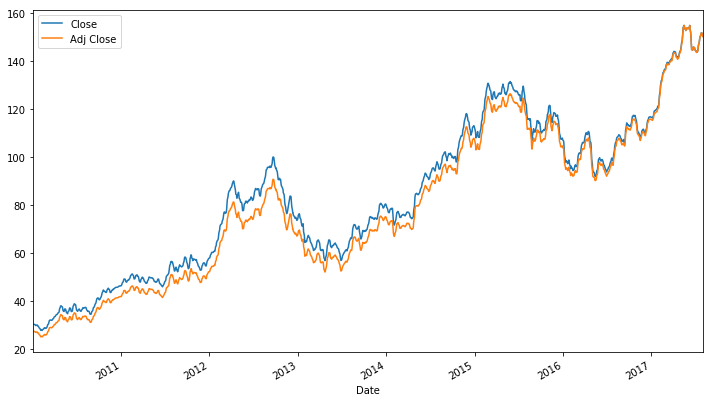

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

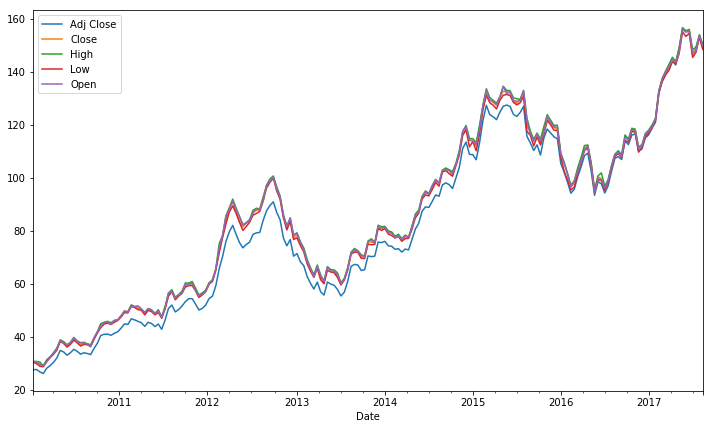

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

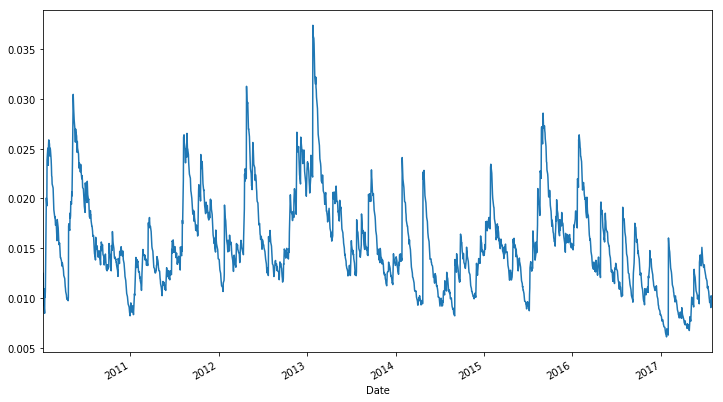

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [ ]:
from demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

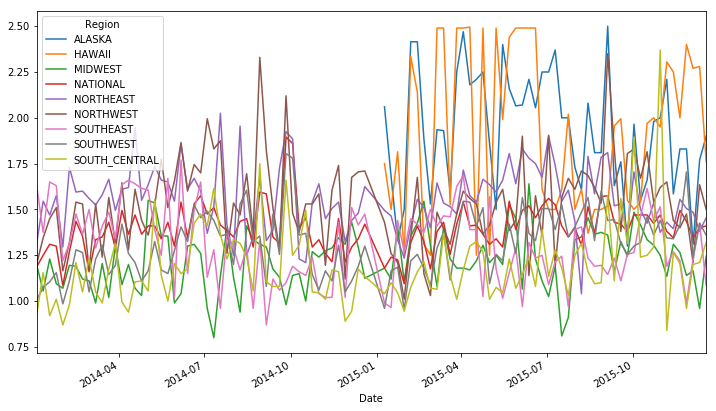

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)

    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

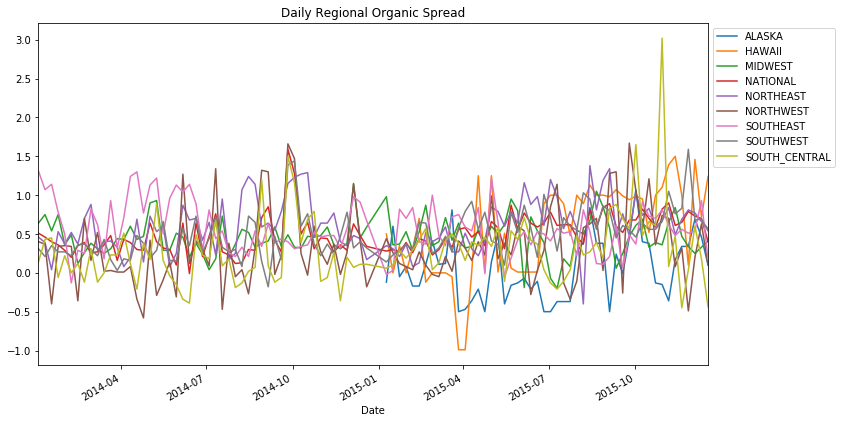

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


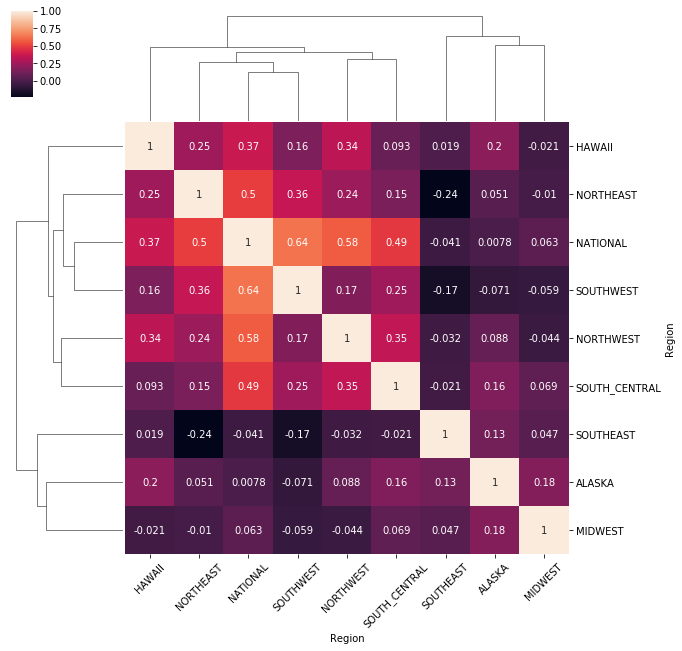

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

**My own example 34**

In [2]:
import requests
import pandas as pd

response = requests.get('https://www.datos.gov.co/resource/8hn7-rpp8.json?$query=SELECT%0A%20%20%60no%60%2C%0A%20%20%60nit%60%2C%0A%20%20%60razon_social%60%2C%0A%20%20%60supervisor%60%2C%0A%20%20%60regi_n%60%2C%0A%20%20%60departamento_domicilio%60%2C%0A%20%20%60ciudad_domicilio%60%2C%0A%20%20%60ciiu%60%2C%0A%20%20%60macrosector%60%2C%0A%20%20%60ingresos_operacionales_2018%60%2C%0A%20%20%60ganancia_perdida_2018%60%2C%0A%20%20%60total_activos_2018%60%2C%0A%20%20%60total_pasivos_2018%60%2C%0A%20%20%60total_patrimonio_2018%60%2C%0A%20%20%60ingresos_operacionales_2017%60%2C%0A%20%20%60ganancia_perdida_2017%60%2C%0A%20%20%60total_activos_2017%60%2C%0A%20%20%60total_pasivos_2017%60%2C%0A%20%20%60total_patrimonio_2017%60%2C%0A%20%20%60grupo_en_niif%60')
datos = pd.DataFrame(response.json())


datos

,no,nit,razon_social,supervisor,regi_n,departamento_domicilio,ciudad_domicilio,ciiu,macrosector,ingresos_operacionales_2018,ganancia_perdida_2018,total_activos_2018,total_pasivos_2018,total_patrimonio_2018,ingresos_operacionales_2017,ganancia_perdida_2017,total_activos_2017,total_pasivos_2017,total_patrimonio_2017,grupo_en_niif
0,1,899999068,ECOPETROL S.A,SUPERFINANCIERA,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA-D.C.-BOGOTA D.C.,B0610 - Extracción de petróleo crudo,MINERO-HIDROCARBUROS,62579849000.00,11556405000.00,113761823000.00,56548216000.00,57213607000.00,49687082000.00,6620412000.00,107549026000.00,59650395000.00,47898631000.00,NIIF PLENAS-GRUPO 1
1,2,830095213,ORGANIZACIÓN TERPEL S.A.,SUPERFINANCIERA,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA-D.C.-BOGOTA D.C.,G4661 - Comercio al por mayor de combustibles ...,COMERCIO,14879440281.00,133741350.00,5488095686.00,3525498461.00,1962597225.00,12493256560.00,195281207.00,3863475148.00,2186212118.00,1677263030.00,NIIF PLENAS-GRUPO 1
2,3,900112515,REFINERIA DE CARTAGENA S.A.S.,SUPERSOCIEDADES,Costa Atlántica,BOLIVAR,CARTAGENA-BOLIVAR,C1921 - Fabricación de productos de la refinac...,MANUFACTURA,12919431000.00,-802449716.00,27881794581.00,9121543502.00,18760251079.00,9150339475.00,48094664.00,26779627629.00,8612363110.00,18167264519.00,NIIF PLENAS-GRUPO 1
3,4,890900608,ALMACENES EXITO S A,SUPERFINANCIERA,Antioquia,ANTIOQUIA,ENVIGADO-ANTIOQUIA,G4711 - Comercio al por menor en establecimien...,COMERCIO,11444486000.00,279403000.00,15663349000.00,8013609000.00,7649740000.00,11250922000.00,217713000.00,15962702000.00,8123134000.00,7839568000.00,NIIF PLENAS-GRUPO 1
4,5,890904996,EMPRESAS PÚBLICAS DE MEDELLÍN ESP,SUPERSERVICIOS,Antioquia,ANTIOQUIA,MEDELLIN-ANTIOQUIA,D3513- Dsitribución de energía electrica,SERVICIOS,8966811000.00,2344822000.00,45595544000.00,22990219000.00,22605325000.00,7927149000.00,2188189000.00,39580960000.00,18082979000.00,21497981000.00,NIIF PLENAS-GRUPO 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,830041054,Diebold Colombia S.A,SUPERSOCIEDADES,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA-D.C.-BOGOTA D.C.,S9511 - Mantenimiento y reparación de computad...,SERVICIOS,134550721.00,9634217.00,95397203.00,55156936.00,40240267.00,142489668.00,14689718.00,130208468.00,99602418.00,30606050.00,NIIF PLENAS-GRUPO 1
996,997,860002274,ETERNA SA,SUPERSOCIEDADES,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA-D.C.-BOGOTA D.C.,C2219 - Fabricación de formas básicas de cauch...,MANUFACTURA,134491689.00,1703162.00,207154183.00,102318836.00,104835347.00,114466490.00,3998609.00,174681846.00,76929202.00,97752644.00,NIIF PLENAS-GRUPO 1
997,998,800000750,Petrosantander (Colombia) Inc,SUPERSOCIEDADES,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA-D.C.-BOGOTA D.C.,B0610 - Extracción de petróleo crudo,MINERO-HIDROCARBUROS,134466854.00,35301665.00,360630669.00,146227580.00,214403089.00,111594829.00,1895707.00,333195657.00,130526706.00,202668951.00,NIIF PYMES-GRUPO 2
998,999,890911878,CARIBEMOTOR DE MEDELLIS S.A.S,SUPERSOCIEDADES,Antioquia,ANTIOQUIA,MEDELLIN-ANTIOQUIA,G4511 - Comercio de vehículos automotores nuevos,COMERCIO,134455953.00,430144.00,78793544.00,25203538.00,53590006.00,127683315.00,872885.00,82382243.00,29222381.00,53159862.00,NIIF PYMES-GRUPO 2


In [3]:
datos.dtypes

no                             object
nit                            object
razon_social                   object
supervisor                     object
regi_n                         object
departamento_domicilio         object
ciudad_domicilio               object
ciiu                           object
macrosector                    object
ingresos_operacionales_2018    object
ganancia_perdida_2018          object
total_activos_2018             object
total_pasivos_2018             object
total_patrimonio_2018          object
ingresos_operacionales_2017    object
ganancia_perdida_2017          object
total_activos_2017             object
total_pasivos_2017             object
total_patrimonio_2017          object
grupo_en_niif                  object
dtype: object

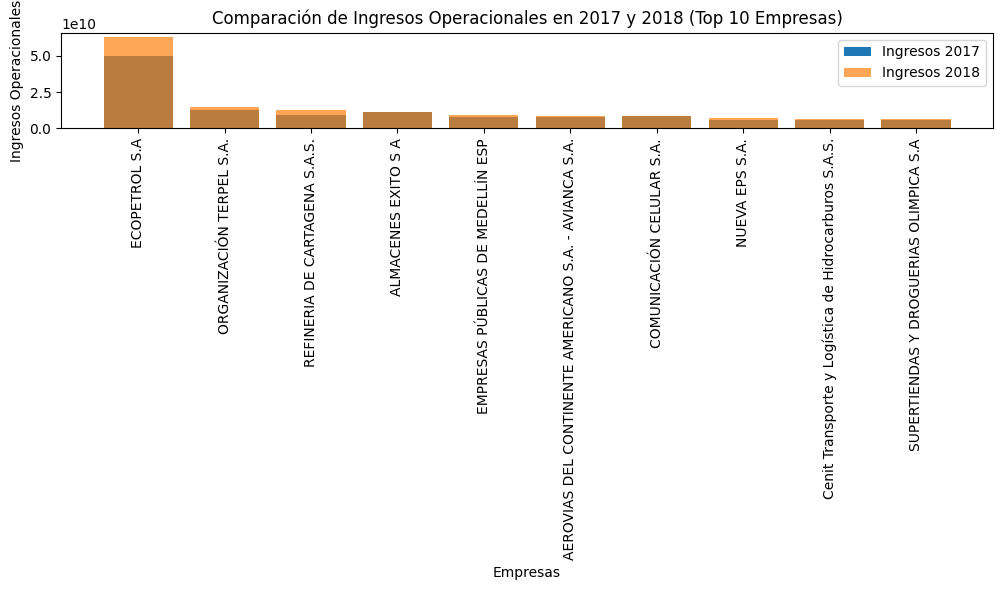

In [5]:
import matplotlib.pyplot as plt

# Convertir las columnas de ingresos operacionales a tipos numéricos
datos['ingresos_operacionales_2017'] = pd.to_numeric(datos['ingresos_operacionales_2017'], errors='coerce')
datos['ingresos_operacionales_2018'] = pd.to_numeric(datos['ingresos_operacionales_2018'], errors='coerce')

# Filtrar solo las filas que tienen datos válidos en estas columnas
datos_filtrados = datos.dropna(subset=['ingresos_operacionales_2017', 'ingresos_operacionales_2018'])

# Seleccionar un subconjunto de datos para la gráfica (por ejemplo, las primeras 10 filas)
datos_grafica = datos_filtrados.head(10)

# Crear una gráfica de barras
plt.figure(figsize=(10, 6))
plt.bar(datos_grafica['razon_social'], datos_grafica['ingresos_operacionales_2017'], label='Ingresos 2017')
plt.bar(datos_grafica['razon_social'], datos_grafica['ingresos_operacionales_2018'], label='Ingresos 2018', alpha=0.7)

plt.xlabel('Empresas')
plt.ylabel('Ingresos Operacionales')
plt.title('Comparación de Ingresos Operacionales en 2017 y 2018 (Top 10 Empresas)')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

# Mostrar la gráfica
plt.show()


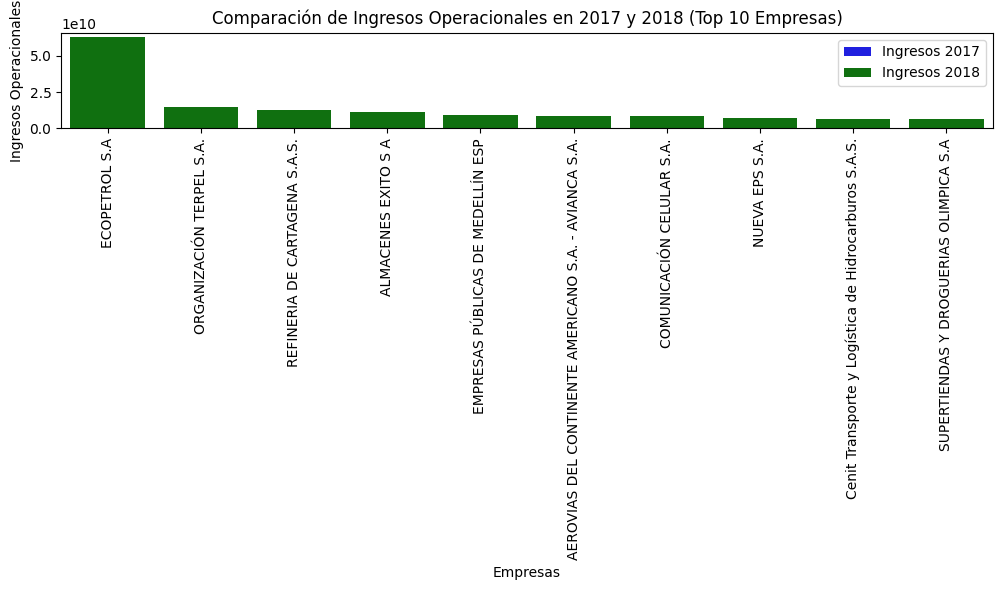

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

url = "https://www.datos.gov.co/resource/8hn7-rpp8.json?$query=SELECT%0A%20%20%60no%60%2C%0A%20%20%60nit%60%2C%0A%20%20%60razon_social%60%2C%0A%20%20%60supervisor%60%2C%0A%20%20%60regi_n%60%2C%0A%20%20%60departamento_domicilio%60%2C%0A%20%20%60ciudad_domicilio%60%2C%0A%20%20%60ciiu%60%2C%0A%20%20%60macrosector%60%2C%0A%20%20%60ingresos_operacionales_2018%60%2C%0A%20%20%60ganancia_perdida_2018%60%2C%0A%20%20%60total_activos_2018%60%2C%0A%20%20%60total_pasivos_2018%60%2C%0A%20%20%60total_patrimonio_2018%60%2C%0A%20%20%60ingresos_operacionales_2017%60%2C%0A%20%20%60ganancia_perdida_2017%60%2C%0A%20%20%60total_activos_2017%60%2C%0A%20%20%60total_pasivos_2017%60%2C%0A%20%20%60total_patrimonio_2017%60%2C%0A%20%20%60grupo_en_niif%60"
response = requests.get(url)

if response.status_code == 200:
    data = pd.DataFrame(response.json())
else:
    print("Error al obtener los datos de la API")

if isinstance(data, pd.DataFrame):
    # Convertir las columnas de ingresos operacionales a tipos numéricos
    data['ingresos_operacionales_2017'] = pd.to_numeric(data['ingresos_operacionales_2017'], errors='coerce')
    data['ingresos_operacionales_2018'] = pd.to_numeric(data['ingresos_operacionales_2018'], errors='coerce')

    # Filtrar solo las filas que tienen datos válidos en estas columnas
    data_filtrada = data.dropna(subset=['ingresos_operacionales_2017', 'ingresos_operacionales_2018'])

    # Seleccionar un subconjunto de datos para la gráfica (por ejemplo, las primeras 10 filas)
    datos_grafica = data_filtrada.head(10)

    # Crear una gráfica de barras utilizando seaborn
    plt.figure(figsize=(10, 6))
    sns.barplot(x='razon_social', y='ingresos_operacionales_2017', data=datos_grafica, label='Ingresos 2017', color='blue')
    sns.barplot(x='razon_social', y='ingresos_operacionales_2018', data=datos_grafica, label='Ingresos 2018', color='green')
    plt.xlabel('Empresas')
    plt.ylabel('Ingresos Operacionales')
    plt.title('Comparación de Ingresos Operacionales en 2017 y 2018 (Top 10 Empresas)')
    plt.xticks(rotation=90)
    plt.legend()
    plt.tight_layout()

    # Mostrar la gráfica
    plt.show()


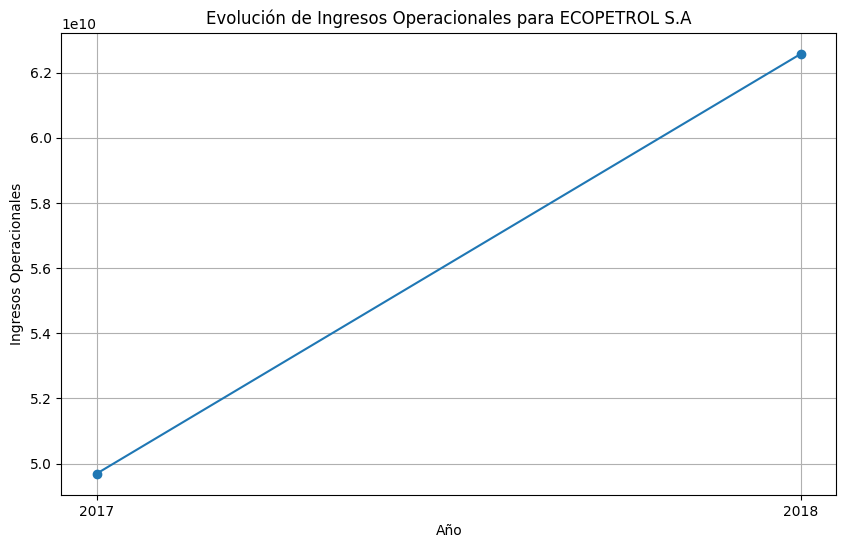

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

url = "https://www.datos.gov.co/resource/8hn7-rpp8.json?$query=SELECT%0A%20%20%60no%60%2C%0A%20%20%60nit%60%2C%0A%20%20%60razon_social%60%2C%0A%20%20%60supervisor%60%2C%0A%20%20%60regi_n%60%2C%0A%20%20%60departamento_domicilio%60%2C%0A%20%20%60ciudad_domicilio%60%2C%0A%20%20%60ciiu%60%2C%0A%20%20%60macrosector%60%2C%0A%20%20%60ingresos_operacionales_2018%60%2C%0A%20%20%60ganancia_perdida_2018%60%2C%0A%20%20%60total_activos_2018%60%2C%0A%20%20%60total_pasivos_2018%60%2C%0A%20%20%60total_patrimonio_2018%60%2C%0A%20%20%60ingresos_operacionales_2017%60%2C%0A%20%20%60ganancia_perdida_2017%60%2C%0A%20%20%60total_activos_2017%60%2C%0A%20%20%60total_pasivos_2017%60%2C%0A%20%20%60total_patrimonio_2017%60%2C%0A%20%20%60grupo_en_niif%60"
response = requests.get(url)

if response.status_code == 200:
    data = pd.DataFrame(response.json())
else:
    print("Error al obtener los datos de la API")

if isinstance(data, pd.DataFrame):
    # Convertir las columnas de ingresos operacionales a tipos numéricos
    data['ingresos_operacionales_2017'] = pd.to_numeric(data['ingresos_operacionales_2017'], errors='coerce')
    data['ingresos_operacionales_2018'] = pd.to_numeric(data['ingresos_operacionales_2018'], errors='coerce')

    # Filtrar solo las filas que tienen datos válidos en estas columnas
    data_filtrada = data.dropna(subset=['ingresos_operacionales_2017', 'ingresos_operacionales_2018'])

    # Seleccionar una empresa específica para la gráfica (por ejemplo, la primera empresa)
    empresa_seleccionada = data_filtrada.iloc[0]

    # Crear una gráfica de líneas para mostrar la evolución de ingresos operacionales
    plt.figure(figsize=(10, 6))
    plt.plot(['2017', '2018'], [empresa_seleccionada['ingresos_operacionales_2017'], empresa_seleccionada['ingresos_operacionales_2018']], marker='o', linestyle='-')
    plt.xlabel('Año')
    plt.ylabel('Ingresos Operacionales')
    plt.title(f'Evolución de Ingresos Operacionales para {empresa_seleccionada["razon_social"]}')
    plt.grid(True)

    # Mostrar la gráfica
    plt.show()


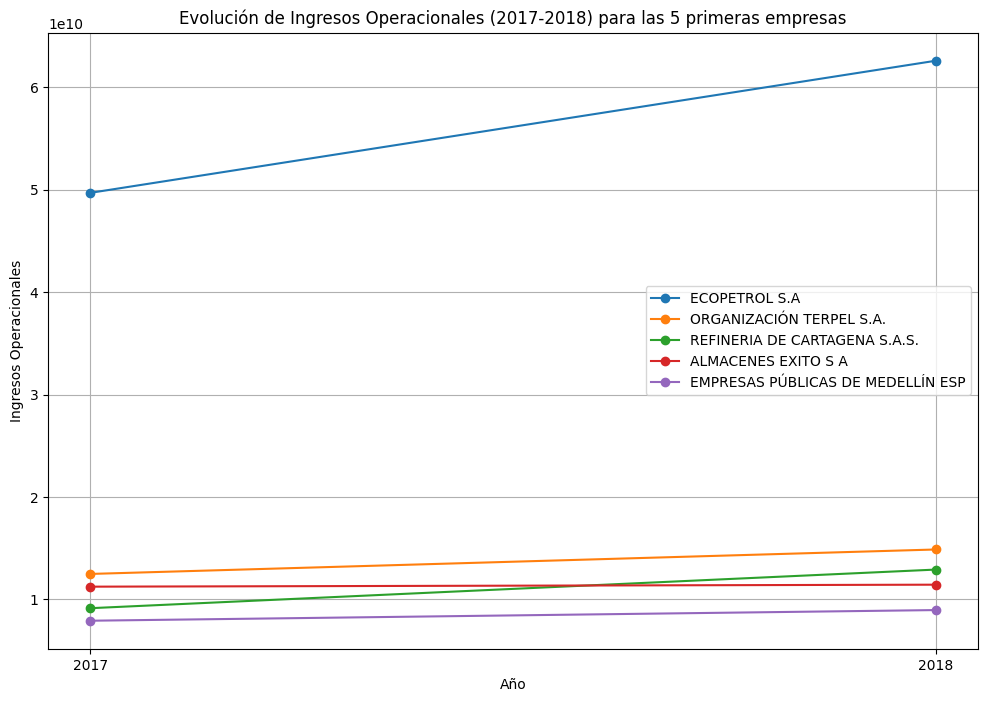

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

url = "https://www.datos.gov.co/resource/8hn7-rpp8.json?$query=SELECT%0A%20%20%60no%60%2C%0A%20%20%60nit%60%2C%0A%20%20%60razon_social%60%2C%0A%20%20%60supervisor%60%2C%0A%20%20%60regi_n%60%2C%0A%20%20%60departamento_domicilio%60%2C%0A%20%20%60ciudad_domicilio%60%2C%0A%20%20%60ciiu%60%2C%0A%20%20%60macrosector%60%2C%0A%20%20%60ingresos_operacionales_2018%60%2C%0A%20%20%60ganancia_perdida_2018%60%2C%0A%20%20%60total_activos_2018%60%2C%0A%20%20%60total_pasivos_2018%60%2C%0A%20%20%60total_patrimonio_2018%60%2C%0A%20%20%60ingresos_operacionales_2017%60%2C%0A%20%20%60ganancia_perdida_2017%60%2C%0A%20%20%60total_activos_2017%60%2C%0A%20%20%60total_pasivos_2017%60%2C%0A%20%20%60total_patrimonio_2017%60%2C%0A%20%20%60grupo_en_niif%60"
response = requests.get(url)

if response.status_code == 200:
    data = pd.DataFrame(response.json())
else:
    print("Error al obtener los datos de la API")

if isinstance(data, pd.DataFrame):
    # Convertir las columnas de ingresos operacionales a tipos numéricos
    data['ingresos_operacionales_2017'] = pd.to_numeric(data['ingresos_operacionales_2017'], errors='coerce')
    data['ingresos_operacionales_2018'] = pd.to_numeric(data['ingresos_operacionales_2018'], errors='coerce')

    # Filtrar solo las filas que tienen datos válidos en estas columnas
    data_filtrada = data.dropna(subset=['ingresos_operacionales_2017', 'ingresos_operacionales_2018'])

    # Seleccionar las primeras 5 empresas para la gráfica
    empresas_seleccionadas = data_filtrada.head(5)

    # Crear una gráfica de líneas para mostrar la evolución de ingresos operacionales
    plt.figure(figsize=(12, 8))

    for index, empresa in empresas_seleccionadas.iterrows():
        plt.plot(['2017', '2018'], [empresa['ingresos_operacionales_2017'], empresa['ingresos_operacionales_2018']], marker='o', label=empresa['razon_social'])

    plt.xlabel('Año')
    plt.ylabel('Ingresos Operacionales')
    plt.title('Evolución de Ingresos Operacionales (2017-2018) para las 5 primeras empresas')
    plt.legend()
    plt.grid(True)

    # Mostrar la gráfica
    plt.show()


# Thanks!